<a href="https://colab.research.google.com/github/Shravan44s/TECHNOHACKS_TASK_3/blob/main/Credit_card_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
fraud=pd.read_csv('/content/creditcard 3.csv')
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0
9964,14864,-1.747939,3.712444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fraud.shape



(9965, 31)

In [5]:
fraud.size


308915

In [6]:

fraud.columns=fraud.columns.str.lower()
fraud.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [7]:
fraud.isna().sum()

time      0
v1        0
v2        0
v3        1
v4        1
v5        1
v6        1
v7        1
v8        1
v9        1
v10       1
v11       1
v12       1
v13       1
v14       1
v15       1
v16       1
v17       1
v18       1
v19       1
v20       1
v21       1
v22       1
v23       1
v24       1
v25       1
v26       1
v27       1
v28       1
amount    1
class     1
dtype: int64

In [8]:
fraud.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [9]:
fraud[fraud.duplicated(subset=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],keep=False)]


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
32,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
34,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
112,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,7602,-4.516626,4.366391,-0.282225,0.641568,-0.694287,1.493967,-2.719045,-7.427753,2.301325,...,7.252584,-2.858266,0.930979,-0.668059,0.258568,-0.339574,0.719033,-0.032462,2.00,0.0
9026,12587,-5.708411,4.794625,-1.155486,0.421606,-0.588195,1.152312,-1.428505,-6.065001,3.783663,...,5.441096,-0.955916,1.007934,0.045643,-1.318965,-0.915560,-5.045247,0.211421,1.00,0.0
9027,12587,-5.708411,4.794625,-1.155486,0.421606,-0.588195,1.152312,-1.428505,-6.065001,3.783663,...,5.441096,-0.955916,1.007934,0.045643,-1.318965,-0.915560,-5.045247,0.211421,1.00,0.0
9028,12587,-5.708411,4.794625,-1.155486,0.421606,-0.588195,1.152312,-1.428505,-6.065001,3.783663,...,5.441096,-0.955916,1.007934,0.045643,-1.318965,-0.915560,-5.045247,0.211421,1.00,0.0


In [10]:
fraud.drop_duplicates(subset=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],keep='first',inplace=True)
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    9923 non-null   int64  
 1   v1      9923 non-null   float64
 2   v2      9923 non-null   float64
 3   v3      9922 non-null   float64
 4   v4      9922 non-null   float64
 5   v5      9922 non-null   float64
 6   v6      9922 non-null   float64
 7   v7      9922 non-null   float64
 8   v8      9922 non-null   float64
 9   v9      9922 non-null   float64
 10  v10     9922 non-null   float64
 11  v11     9922 non-null   float64
 12  v12     9922 non-null   float64
 13  v13     9922 non-null   float64
 14  v14     9922 non-null   float64
 15  v15     9922 non-null   float64
 16  v16     9922 non-null   float64
 17  v17     9922 non-null   float64
 18  v18     9922 non-null   float64
 19  v19     9922 non-null   float64
 20  v20     9922 non-null   float64
 21  v21     9922 non-null   float64
 22  

In [11]:
fraud.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,9923.000000,9923.000000,9923.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,...,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.00000
mean,5946.033962,-0.236338,0.276425,0.907641,0.258241,-0.046032,0.129202,-0.070310,-0.063275,0.800663,...,-0.055649,-0.150424,-0.033943,0.023052,0.087407,0.109543,0.007454,0.003179,63.152453,0.00383
std,4450.067759,1.518133,1.306180,1.157601,1.442324,1.184816,1.308039,1.077793,1.250328,1.156361,...,0.902455,0.629854,0.488510,0.593293,0.427970,0.562879,0.401253,0.266504,184.982366,0.06177
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2068.500000,-1.007265,-0.210894,0.413222,-0.620111,-0.642536,-0.631958,-0.541026,-0.190127,0.067529,...,-0.267843,-0.546561,-0.174933,-0.325341,-0.158142,-0.326861,-0.084394,-0.015747,5.000000,0.00000
50%,4560.000000,-0.369785,0.284980,0.944895,0.216790,-0.152093,-0.156569,-0.053626,0.011961,0.806113,...,-0.123197,-0.135261,-0.046009,0.081410,0.121001,0.044277,-0.004568,0.015882,15.950000,0.00000
75%,10180.000000,1.151700,0.898430,1.602147,1.118966,0.370513,0.495134,0.476188,0.271926,1.505890,...,0.032506,0.248665,0.081208,0.411475,0.359566,0.484491,0.120775,0.077400,51.335000,0.00000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


<Axes: xlabel='class', ylabel='count'>

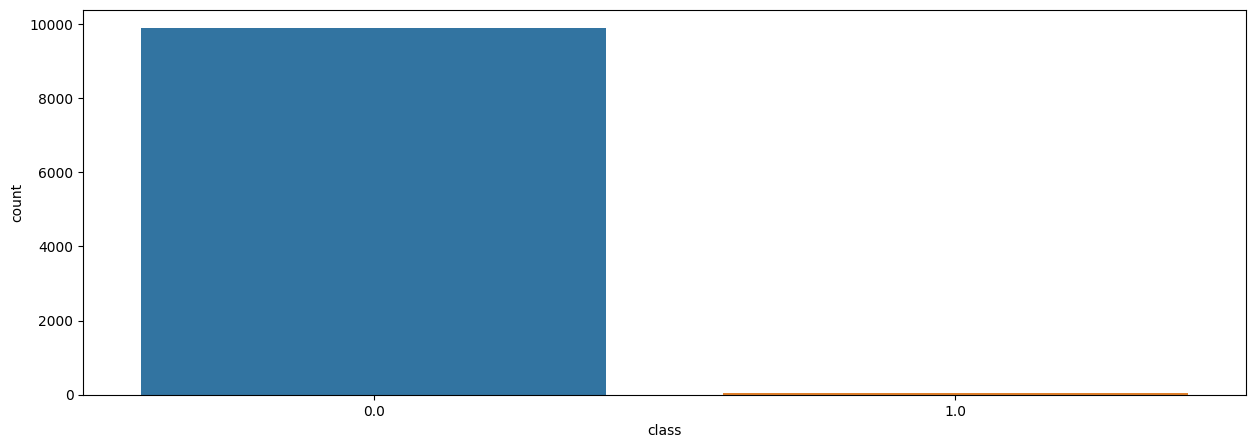

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud,x='class')

In [13]:
fraud['class'].value_counts().to_frame()


,class
0.0,9884
1.0,38


In [14]:

from sklearn.utils import resample
fraud_majority=fraud[fraud['class']==0]
fraud_minority=fraud[fraud['class']==1]

In [15]:
fraud_majority_downsample=resample(fraud_majority,n_samples=473,replace=False,random_state=42)
fraud_df=pd.concat([fraud_majority_downsample,fraud_minority])
fraud_df['class'].value_counts().to_frame()

,class
0.0,473
1.0,38


<Axes: xlabel='class', ylabel='count'>

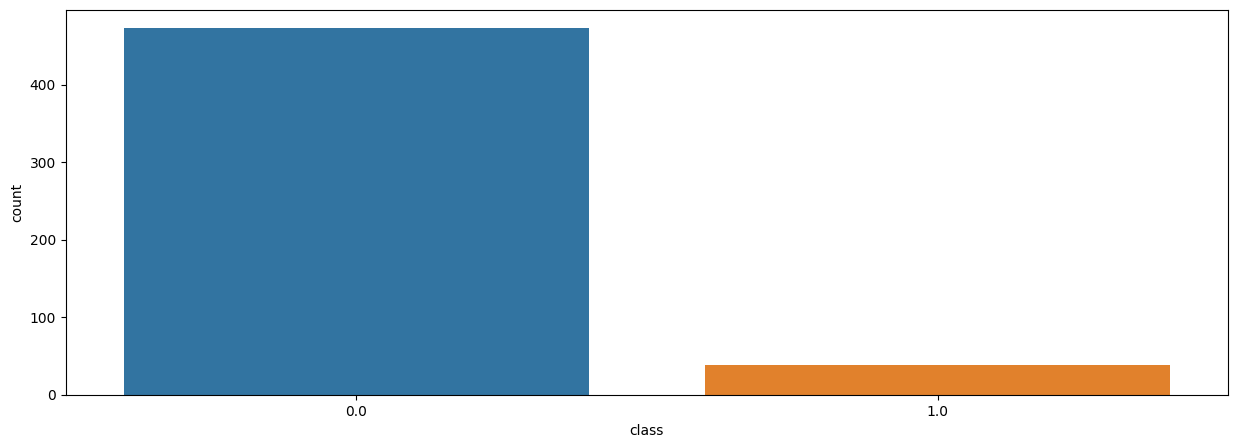

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud_df,x='class')

In [17]:
fraud_df.corr()


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000000,-0.006641,0.118832,-0.160317,0.245675,-0.094667,-0.167807,-0.252870,0.083013,0.232286,...,0.021028,0.035220,0.009560,-0.035223,-0.028628,0.305535,-0.011653,0.105125,-0.042243,0.184176
v1,-0.006641,1.000000,-0.344140,0.152484,-0.136715,0.010458,0.095048,0.136529,-0.052021,0.095585,...,-0.237367,-0.062452,-0.134285,-0.009384,0.164244,-0.024840,-0.107152,-0.112597,-0.155648,-0.271867
v2,0.118832,-0.344140,1.000000,-0.661678,0.590419,-0.124212,-0.313911,-0.460123,0.335979,-0.538577,...,0.331319,-0.098437,-0.033436,-0.152451,-0.072471,0.027415,0.369275,0.253421,-0.345023,0.614949
v3,-0.160317,0.152484,-0.661678,1.000000,-0.629778,0.271793,0.358201,0.713096,-0.491795,0.608528,...,-0.352758,0.108222,0.014865,0.240189,-0.058778,-0.091400,-0.454009,-0.419326,-0.019130,-0.812886
v4,0.245675,-0.136715,0.590419,-0.629778,1.000000,-0.242914,-0.351526,-0.565029,0.336732,-0.543887,...,0.294390,-0.016259,0.035877,-0.226004,0.005541,0.088505,0.304037,0.347247,-0.024846,0.692395
v5,-0.094667,0.010458,-0.124212,0.271793,-0.242914,1.000000,0.225946,0.332007,-0.174048,0.147792,...,-0.229998,-0.182818,-0.122840,0.042400,0.146611,-0.142549,-0.240376,-0.174589,-0.402742,-0.258354
v6,-0.167807,0.095048,-0.313911,0.358201,-0.351526,0.225946,1.000000,0.309707,-0.117755,0.291478,...,-0.070654,-0.092059,-0.048860,0.113422,0.017250,-0.069497,-0.215379,-0.294448,0.218333,-0.440163
v7,-0.252870,0.136529,-0.460123,0.713096,-0.565029,0.332007,0.309707,1.000000,-0.552451,0.435996,...,-0.505364,0.016719,-0.127225,0.158975,0.054675,-0.135562,-0.373788,-0.510454,0.272724,-0.618018
v8,0.083013,-0.052021,0.335979,-0.491795,0.336732,-0.174048,-0.117755,-0.552451,1.000000,-0.447670,...,-0.167131,0.153426,-0.031397,-0.100164,-0.068247,0.064397,0.364030,0.423760,-0.128784,0.346983
v9,0.232286,0.095585,-0.538577,0.608528,-0.543887,0.147792,0.291478,0.435996,-0.447670,1.000000,...,-0.339022,0.022704,-0.003836,0.172765,-0.018767,0.073911,-0.402611,-0.380877,0.048068,-0.540534


<Axes: xlabel='class'>

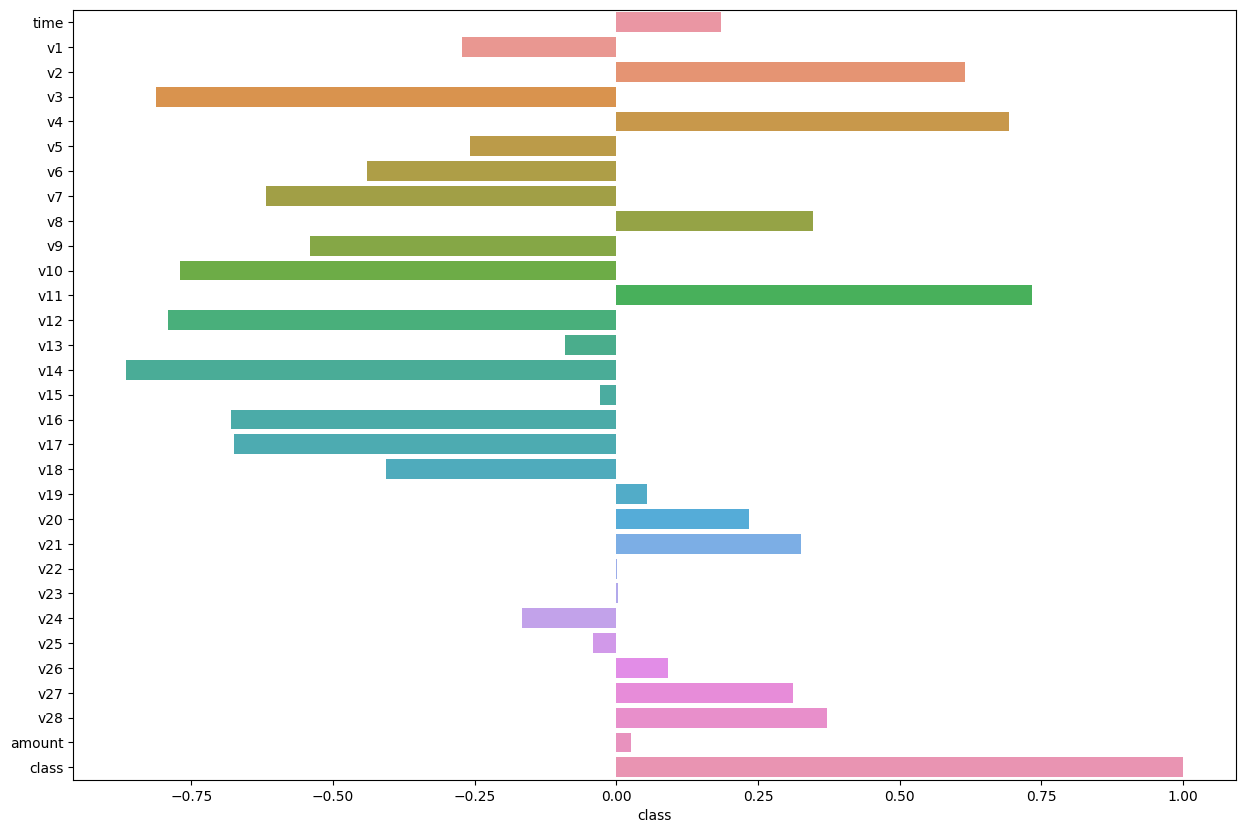

In [18]:
df_corr_class=fraud_df.corr()['class'].to_frame()
plt.figure(figsize=(15,10))
sns.barplot(data=df_corr_class,y=df_corr_class.index,x='class')

In [19]:
x=fraud_df.drop(['class'],axis=1)
y=fraud_df['class']


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((357, 30), (154, 30), (357,), (154,))

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [22]:
lr.score(x_train,y_train)



1.0

In [23]:

lr.score(x_test,y_test)


0.987012987012987

In [24]:

y_pred=lr.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay
precision_score(y_test,y_pred)

1.0

In [26]:
recall_score(y_test,y_pred)

0.875

In [27]:
accuracy_score(y_test,y_pred)

0.987012987012987

In [28]:
f1_score(y_test,y_pred)

0.9333333333333333

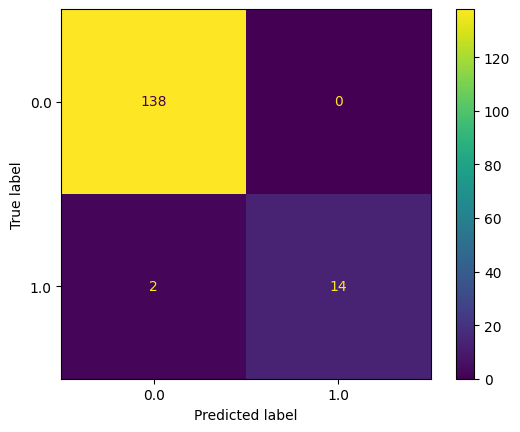

In [29]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()